In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
from torchvision.datasets import MNIST
import torch.nn as nn
import data_utils

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
plt.rcParams.update({'font.size': 12})
device

device(type='cuda')

In [3]:
DATA_DIR = '/datasets/cv_datasets/data'
ds_train = MNIST(root=DATA_DIR, download=True, train=True, transform=None)
ds_test = MNIST(root=DATA_DIR, download=True, train=False, transform=None)
dl_train, dl_val, dl_test = data_utils.get_data_loaders(train_dataset=ds_train, test_dataset=ds_test, batch_size=32)

In [4]:
from mnist import encoder, classifier

encoder = encoder.encoder_mnist()
classifier = classifier.ClassifierMnist()
model = nn.Sequential(encoder, classifier).to(device)

/home/omer.trinin/miniconda3/envs/cs236781-hw/lib/python3.8/site-packages/pl_bolts/__init__.py:11: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, tp_name):
/home/omer.trinin/miniconda3/envs/cs236781-hw/lib/python3.8/site-packages/pl_bolts/__init__.py:11: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if not hasattr(numpy, tp_name):
/home/omer.trinin/miniconda3/envs/cs236781-hw/lib/python3.8/site-packages/pl_bolts/models/self_supervised/amdim/amdim_module.py:34: UnderReviewWarning: The feature generate_power_seq is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  "lr_options": generate_power_seq(LEARNING_RATE_CIFAR, 11),
/home/omer.trinin/minicon

--- EPOCH 1/10 ---
100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1688/1688 [02:09<00:00, 13.08it/s]
Train loss: 0.21579497119067545, accuracy: 94.10545023696683
100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 188/188 [00:07<00:00, 26.16it/s]
Validation loss: 0.0875273532087994, accuracy: 97.30718085106383
Best model saved at epoch 1 with validation loss: 0.0875273532087994
--- EPOCH 2/10 ---
100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1688/1688 [02:11<00:00, 12.85it/s]
Train loss: 0.08414919344585288, accuracy: 97.55813092417061
100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 188/188 [00:07<00:00, 25.95it/s]
Validation loss: 0.055625258839040244, accuracy: 98.25465425531915
Best model saved at epoch 2 with validation loss: 0.055625258839040244
--- EPOCH 3/10 ---
1

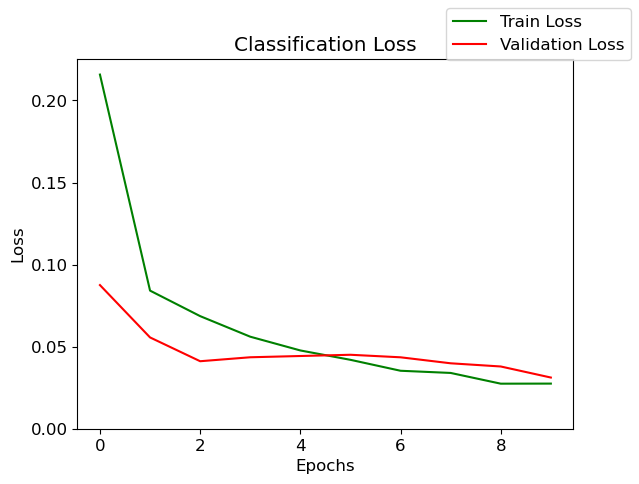

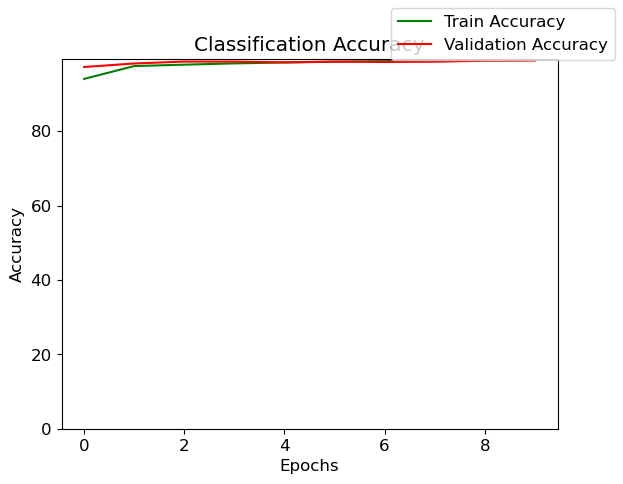

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:12<00:00, 26.04it/s]
Test loss: 0.02740862709501475, accuracy: 99.14137380191693
Amazing!!!


In [5]:
import training

try:
    encoder.load_state_dict(torch.load('saved_models/encoder_supervised_mnist1.pth'))
    classifier.load_state_dict(torch.load('saved_models/classifier_supervised_mnist.pth'))
except:
    optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)
    loss_fn = nn.CrossEntropyLoss()

    trainer = training.ClassifierTrainer(model=model,
                                        optimizer=optimizer,
                                        loss_fn=loss_fn,
                                        device=device)
    trainer.train(num_epochs=10, dl_train=dl_train, dl_val=dl_val)
    trainer.test(dl_test)
    
    torch.save(encoder.state_dict(), 'saved_models/encoder_supervised_mnist.pth')
    torch.save(classifier.state_dict(), 'saved_models/classifier_supervised_mnist.pth')

In [6]:
from utils import plot_tsne

plot_tsne(model=encoder, dataloader=dl_test, device=device, name='supervised_mnist')